<a href="https://colab.research.google.com/github/jyj1206/BDA_9th_Pandas/blob/main/7%EC%A3%BC%EC%B0%A8_%EC%9D%B4%EC%83%81%EC%B9%982_%26_%EC%A0%84%EC%B2%98%EB%A6%AC%EB%A5%BC_%EC%9C%84%ED%95%9C_%EB%8B%A4%EC%96%91%ED%95%9C_%ED%95%A8%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이상치

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# tips 데이터 불러오기
tips = sns.load_dataset('tips')

In [ ]:
# 수치형 변수만 사용
data = tips[['total_bill', 'tip', 'size']]

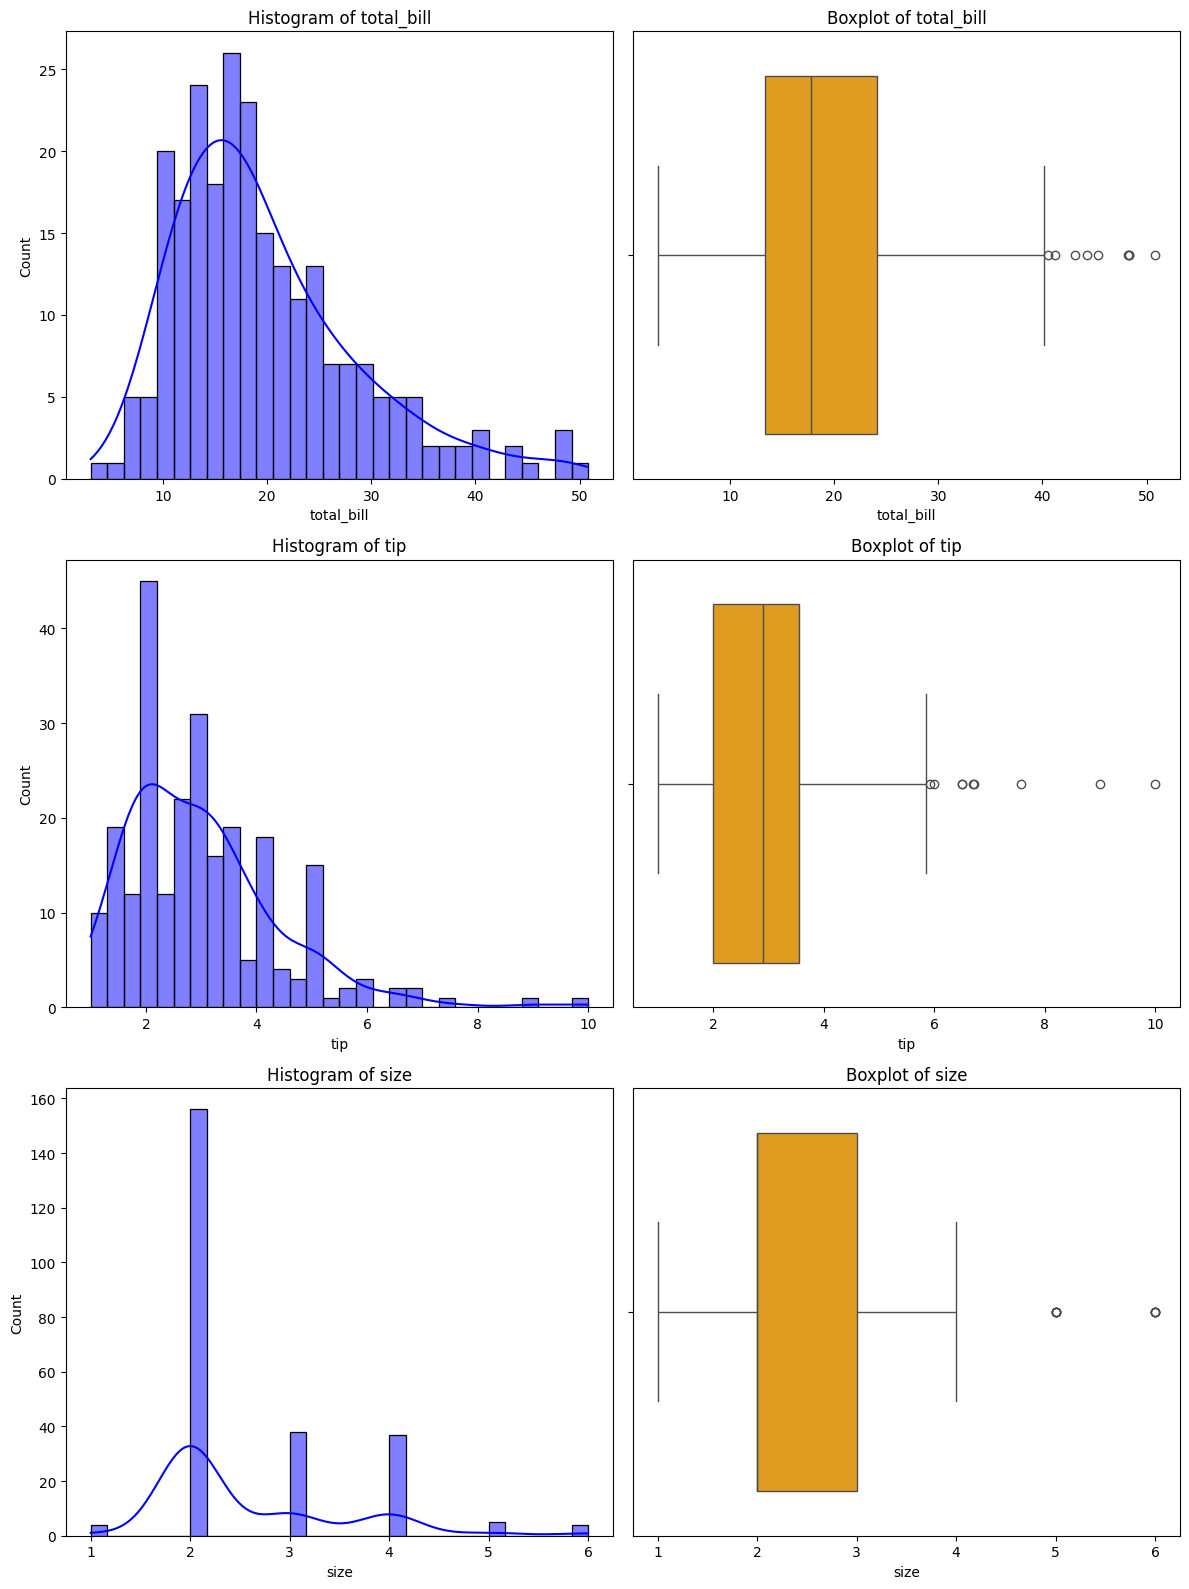

In [ ]:
# 히스토그램 및 박스플롯 시각화
fig, axes = plt.subplots(3, 2, figsize=(12, 16))

for i, column in enumerate(data.columns):
    sns.histplot(data[column], bins=30, ax=axes[i, 0], kde=True, color='blue')
    axes[i, 0].set_title(f'Histogram of {column}')

    sns.boxplot(x=data[column], ax=axes[i, 1], color='orange')
    axes[i, 1].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

### IQR 방법

In [ ]:
def detect_outliers_iqr(df, columns):
    outliers = pd.DataFrame(index=df.index)

    outlier_flags = pd.Series(False, index=df.index)

    for column in columns:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_indices = (df[column] < lower_bound) | (df[column] > upper_bound)
        outlier_flags = outlier_flags | outlier_indices

    return outlier_flags

In [ ]:
outlier_iqr = data[detect_outliers_iqr(data, data.columns)]

In [ ]:
outlier_iqr

,total_bill,tip,size
23,39.42,7.58,4
47,32.40,6.00,4
59,48.27,6.73,4
102,44.30,2.50,3
125,29.80,4.20,6
141,34.30,6.70,6
142,41.19,5.00,5
143,27.05,5.00,6
155,29.85,5.14,5
156,48.17,5.00,6


## IsolationForest 방법

In [ ]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)
outlier_flags = iso.fit_predict(data)

In [ ]:
outlier_iso = data[outlier_flags==-1]

In [ ]:
outlier_iso

,total_bill,tip,size
23,39.42,7.58,4
59,48.27,6.73,4
67,3.07,1.00,1
111,7.25,1.00,1
125,29.80,4.20,6
141,34.30,6.70,6
142,41.19,5.00,5
143,27.05,5.00,6
156,48.17,5.00,6
170,50.81,10.00,3


### Rule-based 방법

In [ ]:
def detect_outliers_rule_based(df):
    conditions = (
        (df['total_bill'] > 50) |
        (df['tip'] > 8) |
        (df['size'] > 5)
    )
    return df[conditions]

outlier_rule = detect_outliers_rule_based(data)

In [ ]:
outlier_rule

,total_bill,tip,size
125,29.80,4.2,6
141,34.30,6.7,6
143,27.05,5.0,6
156,48.17,5.0,6
170,50.81,10.0,3
212,48.33,9.0,4


### PCA 및 시각화

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data.loc[:, 'PCA1'] = data_pca[:, 0]
data.loc[:, 'PCA2'] = data_pca[:, 1]

<ipython-input-15-c063f7d47801>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'PCA1'] = data_pca[:, 0]
<ipython-input-15-c063f7d47801>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'PCA2'] = data_pca[:, 1]


In [ ]:
data.loc[:, 'IQR_Outlier'] = 0
data.loc[outlier_iqr.index, 'IQR_Outlier'] = 1

data.loc[:, 'IsoForest_Outlier'] = 0
data.loc[outlier_iso.index, 'IsoForest_Outlier'] = 1

data.loc[:, 'RuleBased_Outlier'] = 0
data.loc[outlier_rule.index, 'RuleBased_Outlier'] = 1

<ipython-input-16-4a92ebef39fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'IQR_Outlier'] = 0


In [ ]:
# 시각화 함수 선언
def plot_outliers(data, method, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x='PCA1', y='PCA2', data=data,
        hue=method, palette={0: 'blue', 1: 'red'}, alpha=0.7
    )
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Outlier')
    plt.show()

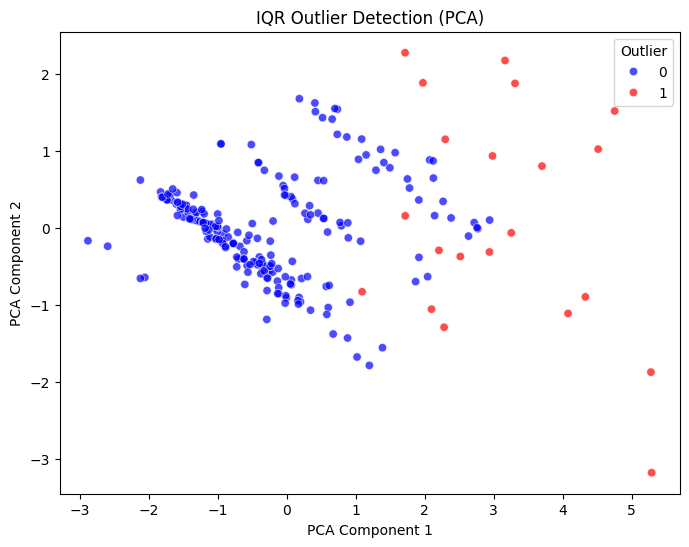

In [ ]:
# IQR 이상치 시각화
plot_outliers(data, 'IQR_Outlier', 'IQR Outlier Detection (PCA)')

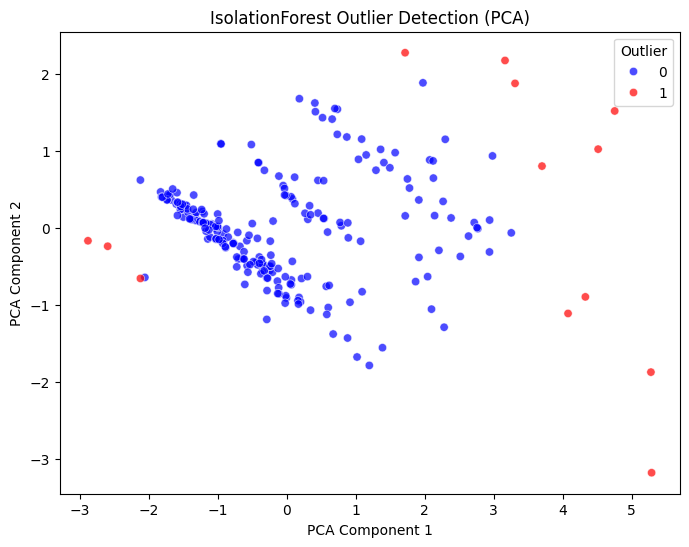

In [ ]:
# IsolationForest 이상치 시각화
plot_outliers(data, 'IsoForest_Outlier', 'IsolationForest Outlier Detection (PCA)')

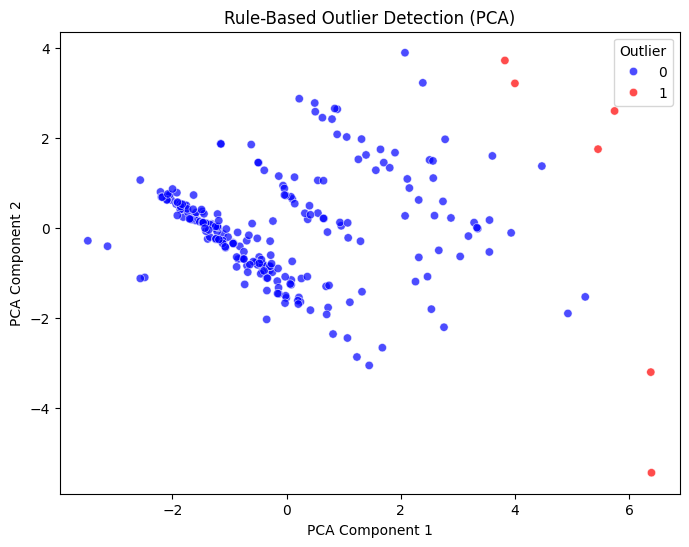

In [ ]:
# Rule-Based 이상치 시각화
plot_outliers(data, 'RuleBased_Outlier', 'Rule-Based Outlier Detection (PCA)')

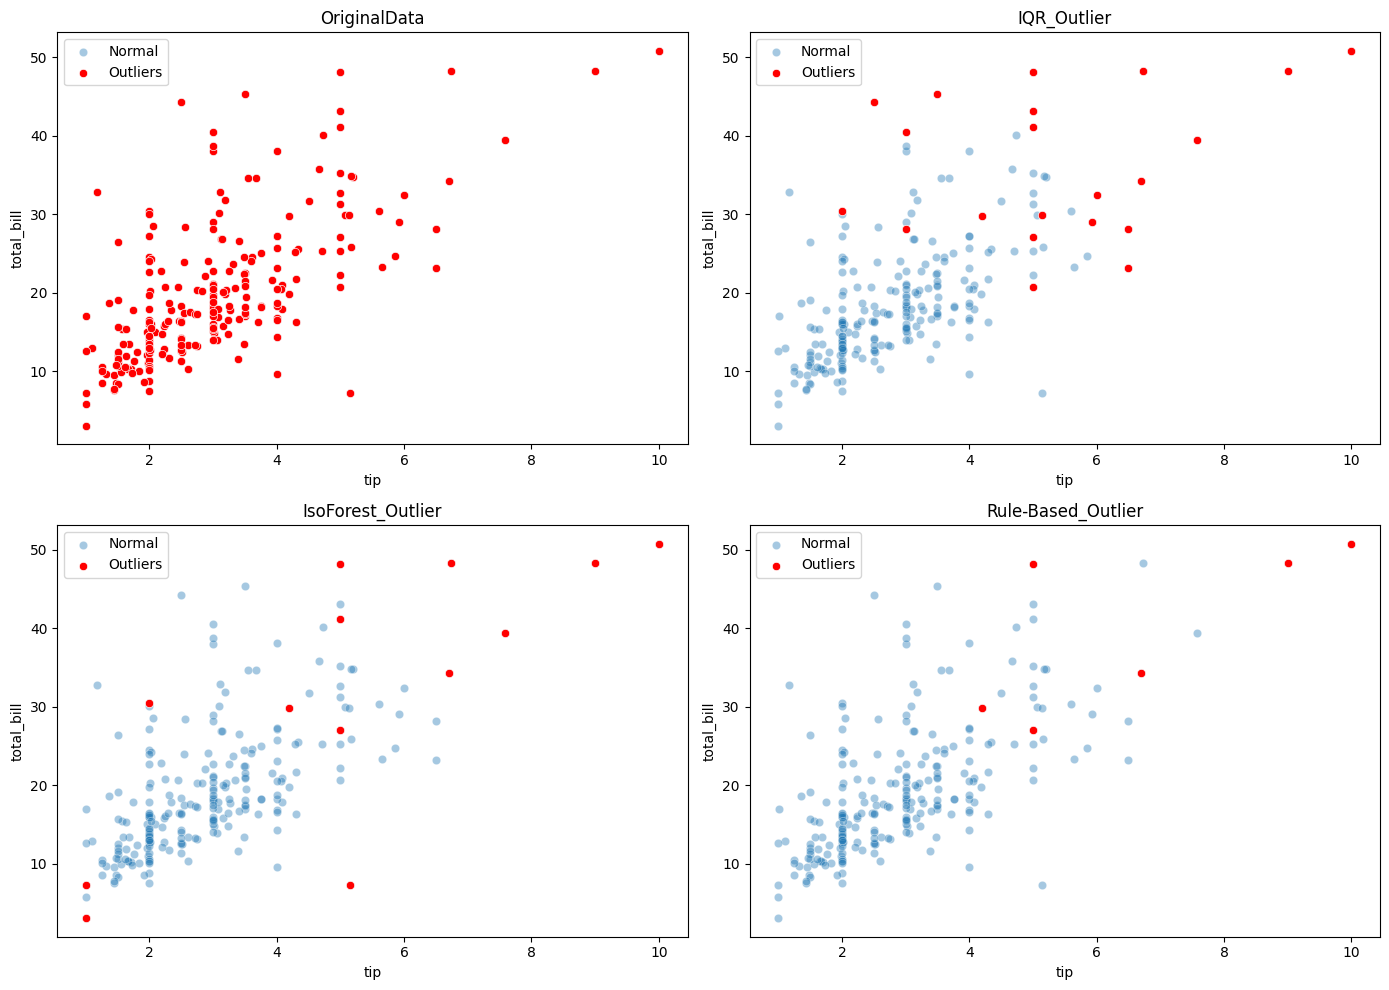

In [ ]:
# 전체 이미지 시각화
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

methods = {
    'OriginalData' : data,
    'IQR_Outlier' : outlier_iqr,
    'IsoForest_Outlier' : outlier_iso,
    'Rule-Based_Outlier' : outlier_rule
}

for i, (method, df) in enumerate(methods.items()):
  ax = axes[i//2, i%2]
  sns.scatterplot(x = 'tip', y = 'total_bill', data = data, ax = ax, label = 'Normal', alpha = 0.4)
  sns.scatterplot(x = 'tip', y = 'total_bill', data = df, ax = ax, label = 'Outliers', color = 'red')
  ax.set_title(method)

plt.tight_layout()
plt.show()

## 전처리를 위한 다양한 함수

In [ ]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('diamonds')

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
## 평균값으로 전처리
# price 평균값 확인
df['price'].mean()

3932.799721913237

In [ ]:
# 등급별 price 확인
df.groupby('cut', observed=True)['price'].apply(lambda x : x.mean())

,price
cut,
Ideal,3457.541970
Premium,4584.257704
Very Good,3981.759891
Good,3928.864452
Fair,4358.757764


In [ ]:
# quality index 계산 함수 적용
def cal_diamoond_quality_index(row):
  carat_score = row['carat'] / 2.5
  price_score = row['price'] / 1000
  cut_score = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Premium' : 4, 'Ideal' : 5}[row['cut']]
  return carat_score + price_score + cut_score

df['quality_index'] = df.apply(cal_diamoond_quality_index, axis=1)

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,quality_index
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5.418
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4.410
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2.419
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4.450
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2.459
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,8.045
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,5.045
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,6.037
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,7.101


In [ ]:
# pipe 적용하기
# 무게(carat)를 카테고리로 변환
def categorize_carat(df):
    df['CaratCategory'] = pd.cut(df['carat'], bins=[0, 0.5, 1.0, 2.5], labels=['Small', 'Medium', 'Large'])
    return df

# 가격(price)을 정규화
def normalize_price(df):
    df['PriceNormalized'] = (df['price'] - df['price'].mean()) / df['price'].std()
    return df

# 컷(cut)을 인코딩
def encode_cut(df):
    cut_mapping = {'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1}
    df['CutEncoded'] = df['cut'].map(cut_mapping)
    return df


# 파이프라인 구성
df_final = (
    df.pipe(categorize_carat)
      .pipe(normalize_price)
      .pipe(encode_cut)
)

In [ ]:
df_final

,carat,cut,color,clarity,depth,table,price,x,y,z,quality_index,CaratCategory,PriceNormalized,CutEncoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5.418,Small,-0.904087,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4.410,Small,-0.904087,4
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2.419,Small,-0.903836,2
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4.450,Small,-0.902081,4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2.459,Small,-0.901831,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,8.045,Medium,-0.294728,5
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,5.045,Medium,-0.294728,2
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,6.037,Medium,-0.294728,3
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,7.101,Medium,-0.294728,4


In [ ]:
# 멀티인덱스 만들기
df_sp = df[['cut', 'color', 'clarity', 'carat', 'depth', 'price']]
multi_idx = df_sp.set_index(['cut', 'color', 'clarity']).groupby(level=[0, 1, 2], observed=False).mean()

In [ ]:
multi_idx

carat      depth        price
cut   color clarity                                  
Ideal D     IF       0.615714  61.496429  6567.178571
            VVS1     0.460139  61.710417  2705.777778
            VVS2     0.544789  61.584859  3619.014085
            VS1      0.533504  61.620228  2576.039886
            VS2      0.499293  61.688478  2111.927174
...                       ...        ...          ...
Fair  J     VS1      1.229375  63.675000  5906.187500
            VS2      1.032609  63.973913  4067.826087
            SI1      1.181071  63.010714  4553.928571
            SI2      1.316667  64.511111  5131.814815
            I1       1.993478  66.460870  5795.043478

[280 rows x 3 columns]

In [ ]:
multi_idx.loc[('Fair','J')]

,carat,depth,price
clarity,,,
IF,NaN,NaN,NaN
VVS1,0.700000,67.600000,1691.000000
VVS2,1.010000,66.000000,2998.000000
VS1,1.229375,63.675000,5906.187500
VS2,1.032609,63.973913,4067.826087
SI1,1.181071,63.010714,4553.928571
SI2,1.316667,64.511111,5131.814815
I1,1.993478,66.460870,5795.043478


In [ ]:
multi_idx.loc[('Fair')]

carat      depth        price
color clarity                                  
D     IF       0.380000  60.766667  1619.666667
      VVS1     0.606667  61.666667  4473.000000
      VVS2     0.591111  61.677778  3607.000000
      VS1      0.630000  63.160000  2921.200000
      VS2      0.843600  62.684000  4512.880000
      SI1      0.913793  64.634483  4273.344828
      SI2      1.016964  64.703571  4355.142857
      I1       1.877500  65.600000  7383.000000
E     IF            NaN        NaN          NaN
      VVS1     0.640000  59.600000  4115.333333
      VVS2     0.600769  60.623077  3119.307692
      VS1      0.632857  61.371429  3307.928571
      VS2      0.690238  64.476190  3041.714286
      SI1      0.867077  63.226154  3901.153846
      SI2      1.015641  63.448718  4172.384615
      I1       0.968889  65.644444  2095.222222
F     IF       0.555000  58.925000  2344.000000
      VVS1     0.668000  59.100000  4679.800000
      VVS2     0.627000  62.610000  4018.200000
      VS1      0.804848  62.430303  4103.060606
      VS2      0.758679  63.577358  3400.471698
      SI1      0.864096  63.230120  3784.686747
      SI2      1.080112  63.834831  4520.112360
      I1       1.023429  65.657143  2543.514286
G     IF       0.455000  61.300000  1488.000000
      VVS1     0.570000  60.066667  2216.333333
      VVS2     0.664706  64.376471  3099.058824
      VS1      0.774222  63.353333  3497.622222
      VS2      0.977778  63.880000  5384.444444
      SI1      0.909565  64.513043  3579.362319
      SI2      1.262000  64.573750  5665.150000
      I1       1.226415  65.333962  3187.471698
H     IF            NaN        NaN          NaN
      VVS1     0.910000  56.500000  4115.000000
      VVS2     0.840909  63.600000  3481.727273
      VS1      0.975938  63.309375  4604.750000
      VS2      1.036829  63.960976  5110.926829
      SI1      1.112267  64.488000  5195.800000
      SI2      1.364396  64.931868  6022.406593
      I1       1.498654  65.759615  4212.961538
I     IF            NaN        NaN          NaN
      VVS1     0.900000  63.500000  4194.000000
      VVS2     0.845000  63.400000  2994.625000
      VS1      1.010400  62.796000  4500.480000
      VS2      0.953125  62.384375  3856.125000
      SI1      1.108000  63.883333  4574.966667
      SI2      1.511556  65.564444  6658.022222
      I1       1.322941  65.729412  3501.000000
J     IF            NaN        NaN          NaN
      VVS1     0.700000  67.600000  1691.000000
      VVS2     1.010000  66.000000  2998.000000
      VS1      1.229375  63.675000  5906.187500
      VS2      1.032609  63.973913  4067.826087
      SI1      1.181071  63.010714  4553.928571
      SI2      1.316667  64.511111  5131.814815
      I1       1.993478  66.460870  5795.043478

In [ ]:
multi_idx.loc['Good' :'Fair']

carat      depth         price
cut  color clarity                                   
Good D     IF       0.786667  60.877778  10030.333333
           VVS1     0.490769  61.653846   2586.230769
           VVS2     0.481200  62.284000   2345.640000
           VS1      0.663256  61.597674   3556.581395
           VS2      0.702500  62.758654   3588.461538
...                      ...        ...           ...
Fair J     VS1      1.229375  63.675000   5906.187500
           VS2      1.032609  63.973913   4067.826087
           SI1      1.181071  63.010714   4553.928571
           SI2      1.316667  64.511111   5131.814815
           I1       1.993478  66.460870   5795.043478

[112 rows x 3 columns]

In [ ]:
multi_idx.loc[('Good')].loc['D':'H']

carat      depth         price
color clarity                                   
D     IF       0.786667  60.877778  10030.333333
      VVS1     0.490769  61.653846   2586.230769
      VVS2     0.481200  62.284000   2345.640000
      VS1      0.663256  61.597674   3556.581395
      VS2      0.702500  62.758654   3588.461538
      SI1      0.700802  62.755696   3021.172996
      SI2      0.858251  62.063229   3595.295964
      I1       1.040000  61.350000   3490.750000
E     IF       0.373333  61.811111   1519.222222
      VVS1     0.418140  61.525581   1905.953488
      VVS2     0.560192  62.192308   3390.153846
      VS1      0.680674  61.602247   3712.775281
      VS2      0.739375  61.877500   3772.018750
      SI1      0.723859  62.754085   3162.132394
      SI2      0.882574  61.986634   3785.490099
      I1       1.330870  61.660870   4398.130435
F     IF       0.533333  60.620000   3132.866667
      VVS1     0.465714  62.291429   2189.514286
      VVS2     0.607600  61.824000   3192.360000
      VS1      0.624621  61.317424   2787.507576
      VS2      0.752120  62.487500   3790.543478
      SI1      0.768278  62.499267   3261.454212
      SI2      1.002537  62.250746   4426.786070
      I1       0.976316  62.889474   2569.526316
G     IF       0.648182  61.509091   4060.136364
      VVS1     0.547073  61.987805   2705.195122
      VVS2     0.626133  62.625333   3310.466667
      VS1      0.779211  62.446711   4302.427632
      VS2      0.815677  62.365104   4140.713542
      SI1      0.883816  62.896618   4129.328502
      SI2      1.086933  62.544172   4776.411043
      I1       1.174211  62.568421   3195.789474
H     IF       0.935000  61.975000   5948.750000
      VVS1     0.473548  62.477419   1719.709677
      VVS2     0.588444  62.562222   2428.000000
      VS1      0.779870  62.277922   3819.116883
      VS2      0.877971  62.675362   4433.043478
      SI1      0.906723  62.585957   4179.285106
      SI2      1.173544  62.391139   5529.778481
      I1       1.252143  61.757143   3849.714286

In [ ]:
multi_idx.xs('G', level='color')

carat      depth        price
cut       clarity                                  
Ideal     IF       0.454705  61.663951  2206.030550
          VVS1     0.539108  61.667508  2909.198653
          VVS2     0.646085  61.692377  3795.651163
          VS1      0.717146  61.696642  4116.918153
          VS2      0.769703  61.726813  4310.035165
          SI1      0.760258  61.717424  3441.107576
          SI2      0.976111  61.732510  4612.086420
          I1       1.168750  61.400000  4044.437500
Premium   IF       0.564023  60.904598  3311.114943
          VVS1     0.535146  61.060234  2933.654971
          VVS2     0.692655  61.297091  4323.570909
          VS1      0.750177  61.419965  4435.823322
          VS2      0.809459  61.287933  4556.255201
          SI1      0.882721  61.340106  4303.348057
          SI2      1.142703  61.183943  5617.205285
          I1       1.291304  61.113043  4051.521739
Very Good IF       0.600380  61.470886  3525.240506
          VVS1     0.524737  61.586316  2719.331579
          VVS2     0.650695  61.821523  3711.784768
          VS1      0.701319  61.701620  3770.150463
          VS2      0.810271  61.901670  4426.816284
          SI1      0.785759  61.963502  3481.871308
          SI2      1.032752  62.011009  4699.269113
          I1       1.123750  61.943750  3194.812500
Good      IF       0.648182  61.509091  4060.136364
          VVS1     0.547073  61.987805  2705.195122
          VVS2     0.626133  62.625333  3310.466667
          VS1      0.779211  62.446711  4302.427632
          VS2      0.815677  62.365104  4140.713542
          SI1      0.883816  62.896618  4129.328502
          SI2      1.086933  62.544172  4776.411043
          I1       1.174211  62.568421  3195.789474
Fair      IF       0.455000  61.300000  1488.000000
          VVS1     0.570000  60.066667  2216.333333
          VVS2     0.664706  64.376471  3099.058824
          VS1      0.774222  63.353333  3497.622222
          VS2      0.977778  63.880000  5384.444444
          SI1      0.909565  64.513043  3579.362319
          SI2      1.262000  64.573750  5665.150000
          I1       1.226415  65.333962  3187.471698

In [ ]:
multi_idx.xs('IF', level='clarity')

carat      depth         price
cut       color                                   
Ideal     D      0.615714  61.496429   6567.178571
          E      0.457722  61.716456   3258.936709
          F      0.411493  61.614925   2153.708955
          G      0.454705  61.663951   2206.030550
          H      0.474602  61.557522   1982.765487
          I      0.451474  61.751579   1502.621053
          J      0.576800  61.956000   2489.000000
Premium   D      0.708000  61.070000   9056.500000
          E      0.576296  60.859259   4525.444444
          F      0.525484  61.112903   3617.580645
          G      0.564023  60.904598   3311.114943
          H      0.598000  61.290000   3384.750000
          I      0.573043  61.078261   2358.565217
          J      1.141667  61.458333   7026.000000
Very Good D      0.803043  61.513043  10298.260870
          E      0.579302  61.160465   4332.744186
          F      0.606866  61.123881   4677.074627
          G      0.600380  61.470886   3525.240506
          H      0.558276  61.858621   2647.689655
          I      0.764737  61.278947   4093.894737
          J      0.455000  61.387500   1074.125000
Good      D      0.786667  60.877778  10030.333333
          E      0.373333  61.811111   1519.222222
          F      0.533333  60.620000   3132.866667
          G      0.648182  61.509091   4060.136364
          H      0.935000  61.975000   5948.750000
          I      0.530000  62.150000   1749.333333
          J      0.690000  62.466667   2738.000000
Fair      D      0.380000  60.766667   1619.666667
          E           NaN        NaN           NaN
          F      0.555000  58.925000   2344.000000
          G      0.455000  61.300000   1488.000000
          H           NaN        NaN           NaN
          I           NaN        NaN           NaN
          J           NaN        NaN           NaN

In [ ]:
## 피벗테이블
df

,carat,cut,color,clarity,depth,table,price,x,y,z,quality_index,CaratCategory,PriceNormalized,CutEncoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5.418,Small,-0.904087,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4.410,Small,-0.904087,4
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2.419,Small,-0.903836,2
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4.450,Small,-0.902081,4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2.459,Small,-0.901831,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,8.045,Medium,-0.294728,5
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,5.045,Medium,-0.294728,2
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,6.037,Medium,-0.294728,3
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,7.101,Medium,-0.294728,4


In [ ]:
df.pivot_table(values='price', index='cut', columns = 'color', aggfunc='mean', observed=False)

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2629.094566,2597.550090,3374.939362,3720.706388,3889.334831,4451.970377,4918.186384
Premium,3631.292576,3538.914420,4324.890176,4500.742134,5216.706780,5946.180672,6294.591584
Very Good,3470.467284,3214.652083,3778.820240,3872.753806,4535.390351,5255.879568,5103.513274
Good,3405.382175,3423.644159,3495.750275,4123.482204,4276.254986,5078.532567,4574.172638
Fair,4291.061350,3682.312500,3827.003205,4239.254777,5135.683168,4685.445714,4975.655462


In [ ]:
df.pivot_table(values='price', index='cut', columns = 'color', aggfunc='sum', observed=False)

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,7450854,10138238,12912518,18171930,12115278,9317974,4406695
Premium,5820962,8270443,10081319,13160170,12311428,8491146,5086030
Very Good,5250817,7715165,8177367,8903461,8272552,6328079,3460182
Good,2254363,3194260,3177637,3591553,3001931,2650994,1404271
Fair,699443,824838,1194025,1331126,1556112,819953,592103


In [ ]:
df.pivot_table(values='price', index='cut', columns = 'color', aggfunc='count', observed=False)

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678
Good,662,933,909,871,702,522,307
Fair,163,224,312,314,303,175,119


In [ ]:
df.pivot_table(values='price', index='cut', columns = 'color', aggfunc=['mean', 'sum', 'count'], observed=False)

mean                                                      \
color                D            E            F            G            H   
cut                                                                          
Ideal      2629.094566  2597.550090  3374.939362  3720.706388  3889.334831   
Premium    3631.292576  3538.914420  4324.890176  4500.742134  5216.706780   
Very Good  3470.467284  3214.652083  3778.820240  3872.753806  4535.390351   
Good       3405.382175  3423.644159  3495.750275  4123.482204  4276.254986   
Fair       4291.061350  3682.312500  3827.003205  4239.254777  5135.683168   

                                         sum                      ...  \
color                I            J        D         E         F  ...   
cut                                                               ...   
Ideal      4451.970377  4918.186384  7450854  10138238  12912518  ...   
Premium    5946.180672  6294.591584  5820962   8270443  10081319  ...   
Very Good  5255.879568  5103.513274  5250817   7715165   8177367  ...   
Good       5078.532567  4574.172638  2254363   3194260   3177637  ...   
Fair       4685.445714  4975.655462   699443    824838   1194025  ...   

                                      count                                     
color             H        I        J     D     E     F     G     H     I    J  
cut                                                                             
Ideal      12115278  9317974  4406695  2834  3903  3826  4884  3115  2093  896  
Premium    12311428  8491146  5086030  1603  2337  2331  2924  2360  1428  808  
Very Good   8272552  6328079  3460182  1513  2400  2164  2299  1824  1204  678  
Good        3001931  2650994  1404271   662   933   909   871   702   522  307  
Fair        1556112   819953   592103   163   224   312   314   303   175  119  

[5 rows x 21 columns]

In [ ]:
# 전치
df.T

,0,1,2,3,4,5,6,7,8,9,...,53930,53931,53932,53933,53934,53935,53936,53937,53938,53939
carat,0.23,0.21,0.23,0.29,0.31,0.24,0.24,0.26,0.22,0.23,...,0.71,0.71,0.7,0.7,0.72,0.72,0.72,0.7,0.86,0.75
cut,Ideal,Premium,Good,Premium,Good,Very Good,Very Good,Very Good,Fair,Very Good,...,Premium,Premium,Very Good,Very Good,Premium,Ideal,Good,Very Good,Premium,Ideal
color,E,E,E,I,J,J,I,H,E,H,...,E,F,E,E,D,D,D,D,H,D
clarity,SI2,SI1,VS1,VS2,SI2,VVS2,VVS1,SI1,VS2,VS1,...,SI1,SI1,VS2,VS2,SI1,SI1,SI1,SI1,SI2,SI2
depth,61.5,59.8,56.9,62.4,63.3,62.8,62.3,61.9,65.1,59.4,...,60.5,59.8,60.5,61.2,62.7,60.8,63.1,62.8,61.0,62.2
table,55.0,61.0,65.0,58.0,58.0,57.0,57.0,55.0,61.0,61.0,...,55.0,62.0,59.0,59.0,59.0,57.0,55.0,60.0,58.0,55.0
price,326,326,327,334,335,336,336,337,337,338,...,2756,2756,2757,2757,2757,2757,2757,2757,2757,2757
x,3.95,3.89,4.05,4.2,4.34,3.94,3.95,4.07,3.87,4.0,...,5.79,5.74,5.71,5.69,5.69,5.75,5.69,5.66,6.15,5.83
y,3.98,3.84,4.07,4.23,4.35,3.96,3.98,4.11,3.78,4.05,...,5.74,5.73,5.76,5.72,5.73,5.76,5.75,5.68,6.12,5.87
z,2.43,2.31,2.31,2.63,2.75,2.48,2.47,2.53,2.49,2.39,...,3.49,3.43,3.47,3.49,3.58,3.5,3.61,3.56,3.74,3.64


In [ ]:
# 크게 의미는 없지만 melt 실습을 위해 사용
df_melted = pd.melt(
    df,
    id_vars=['cut', 'color'],       # 유지할 열
    value_vars=['price'],          # 변환할 열
    var_name='Attribute',          # 새로 생성될 열 이름
    value_name='Value'             # 값이 들어갈 열 이름
)

In [ ]:
df_melted

,cut,color,Attribute,Value
0,Ideal,E,price,326
1,Premium,E,price,326
2,Good,E,price,327
3,Premium,I,price,334
4,Good,J,price,335
...,...,...,...,...
53935,Ideal,D,price,2757
53936,Good,D,price,2757
53937,Very Good,D,price,2757
53938,Premium,H,price,2757
